Notes:

1. Import libraries like torch, numpy, pandas, torchvision, path, matplotlib, utils, transforms.
2. Define test train val datasets through Image Folder along with transforms.
3. Print lenght of the train dataset
4. Create data dictionary associating target values 
5. Print number of classes 
6. Create Dataloaders with Batch size = 64
7. Create a show batch method
8. Define the model. Used pretrained model - efficientnet_b0(smallest variant in the EfficientNet series)
9. Define classifier, output size - 1280 and forward method.
10. Load the model
11. Define loss(Cross Entropy) and optimizer(Adam) - lr = 0.001
12. Define training loop and evalutaion loop
13. Run the model.


In [31]:
#Import Libraries
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
from torchvision.utils import make_grid
from torchmetrics.classification import Accuracy, Precision, Recall

In [34]:
#Define Path
train_path = '/kaggle/input/cards-image-datasetclassification/train'
test_path = '/kaggle/input/cards-image-datasetclassification/test'
val_path = '/kaggle/input/cards-image-datasetclassification/valid'

In [35]:
#Define Transformer
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

In [36]:
#Create Datasets
train_dataset = ImageFolder(train_path, transform = transform)
test_dataset = ImageFolder(test_path,transform = transform)
val_dataset = ImageFolder(val_path,transform = transform)

In [37]:
len(train_dataset)

7624

In [38]:
image, label = test_dataset[60]
print(label)
image

12


tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.6824, 0.9765, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.7765, 0.8000, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.6039, 0.9569],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.5451, 0.9529],
         [1.0000, 1.0000, 1.0000,  ..., 0.9490, 0.6078, 0.9647],
         [1.0000, 1.0000, 1.0000,  ..., 0.7686, 0.7725, 0.9961]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.6824, 0.9765, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.7765, 0.8000, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.6039, 0.9569],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.5451, 0.9529],
         [1.0000, 1.0000, 1.0000,  ..., 0.9490, 0.6078, 0.9647],
         [1.0000, 1.0000, 1.0000,  ..., 0.7686, 0.7725, 0.9961]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.6824, 0.9765, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.7765, 0.8000, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.6039, 0.

In [39]:
# Data dictionary associating target values with folder names
target_to_class = {v: k for k, v in ImageFolder(train_path).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [40]:
#Number of Classes
num_classes = len(train_dataset.classes)
num_classes

53

In [41]:
#Dataloaders

batch_size = 64

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,shuffle=True
)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,shuffle=True
)
val_dataloader = DataLoader(
    val_dataset,
    batch_size=batch_size,shuffle=True
)

In [42]:
#Display data
def show_batch(dataloader):
    for images, labels in dataloader:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

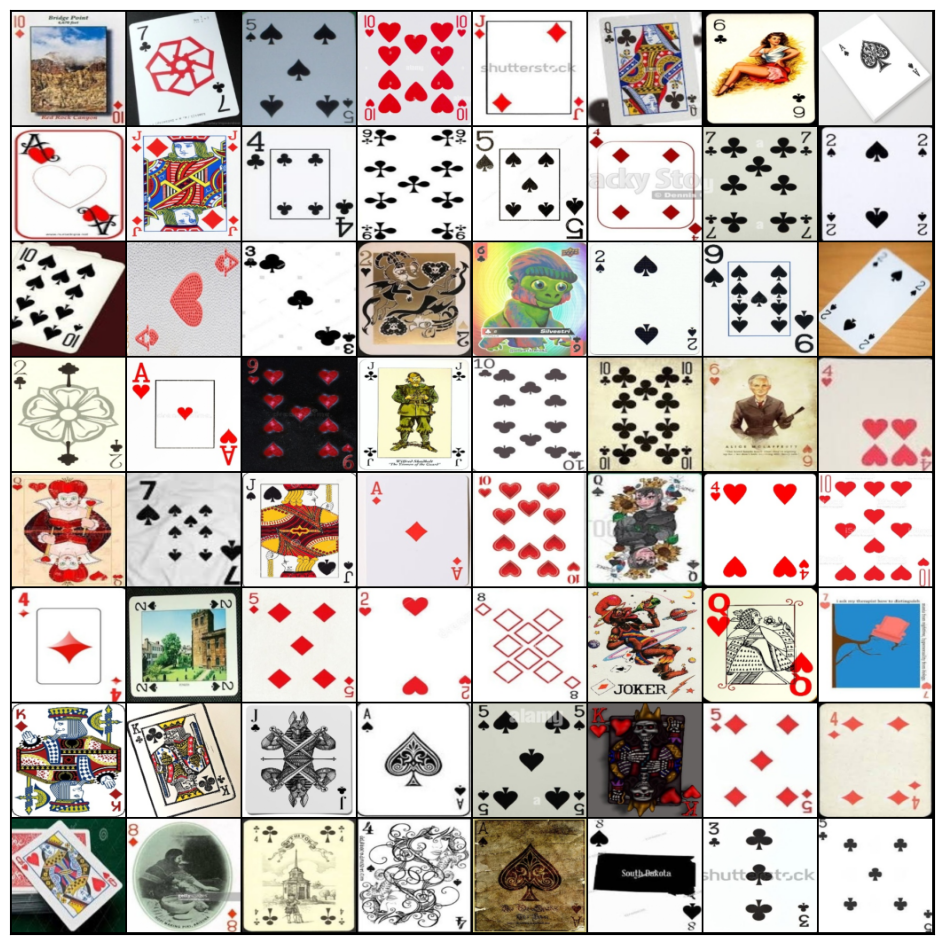

In [43]:
show_batch(train_dataloader)

In [44]:
#Define the model
class CardModel(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifer, self).__init__()
        
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
       
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )
    
    def forward(self, x):
        
        x = self.features(x)
        output = self.classifier(x)
        return output

In [46]:
#Load the model
model = CardModel(num_classes=53)

In [54]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [56]:
#Train the model
def train(model, dataloader, loss_fn, optimizer):
    train_losses, val_losses = [], []

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    #Training mode
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_dataloader, desc='Training loop'):
        images, labels = images.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()
        
        #Model Prediction
        outputs = model(images)
        
        #Calculate loss
        loss = loss_fn(outputs, labels)
        
        #Backpropogation
        loss.backward()
        
        #Update the parameters
        optimizer.step()
        
        running_loss += loss.item() * labels.size(0)
        
    train_loss = running_loss / len(train_dataloader.dataset)
    train_losses.append(train_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Train l loss: {val_loss}")

In [69]:
# Evaluate the model
def evaluate(model, dataloader, loss_fn, dataclass="Test"):
    model.eval()
  
    running_loss = 0.0
    
    # Initialize evaluation metrics
    acc = Accuracy(task="multiclass", num_classes=53, average="macro").to(device)
    prec = Precision(task="multiclass", num_classes=53, average="macro").to(device)
    recall = Recall(task="multiclass", num_classes=53, average="macro").to(device)

    with torch.no_grad():
        for images, labels in tqdm(val_dataloader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)
         
            # Get model predictions
            outputs = model(images)
           
            # Calculate loss
            loss = loss_fn(outputs, labels)
            running_loss += loss.item() * labels.size(0)
            
            # Update evaluation metrics
            acc(outputs.argmax(dim=1), labels)
            prec(outputs.argmax(dim=1), labels)
            recall(outputs.argmax(dim=1), labels)

            # Compute metric values
            acc_value = acc.compute()
            prec_value = prec.compute()
            recall_value = recall.compute()
            
    val_loss = running_loss / len(val_dataloader.dataset)
    val_losses.append(val_loss)
    print(f"Accuracy: {acc_value} Prediction: {prec_value} Recall: {recall_value}Validation loss: {val_loss}")

In [70]:
#Run 
epochs = 5

for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1} \n=============")

    train(model, train_dataloader, loss_fn, optimizer)
    evaluate(model, test_dataloader, loss_fn, dataclass="Train")
    evaluate(model, test_dataloader, loss_fn, dataclass="Test")


Epoch 1 


Training loop:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1/5 - Train loss: 0.0477687717383143, Validation loss: 0.2347224197297726


Validation loop:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy: 0.9886792898178101 Prediction: 0.990566074848175 Recall: 0.9886792898178101Validation loss: 0.05667989854613003


Validation loop:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy: 0.9886792898178101 Prediction: 0.990566074848175 Recall: 0.9886792898178101Validation loss: 0.056679891134208106

Epoch 2 


Training loop:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2/5 - Train loss: 0.04826102944839539, Validation loss: 0.2347224197297726


Validation loop:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy: 0.9811321496963501 Prediction: 0.9851752519607544 Recall: 0.9811321496963501Validation loss: 0.07001858949626505


Validation loop:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy: 0.9811321496963501 Prediction: 0.9851752519607544 Recall: 0.9811321496963501Validation loss: 0.07001858525118738

Epoch 3 


Training loop:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3/5 - Train loss: 0.05341380397356257, Validation loss: 0.2347224197297726


Validation loop:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy: 0.9698113799095154 Prediction: 0.9742138385772705 Recall: 0.9698113799095154Validation loss: 0.12753223743078843


Validation loop:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy: 0.9698113799095154 Prediction: 0.9742138385772705 Recall: 0.9698113799095154Validation loss: 0.12753221881839463

Epoch 4 


Training loop:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4/5 - Train loss: 0.04002656232773796, Validation loss: 0.2347224197297726


Validation loop:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy: 0.9849057197570801 Prediction: 0.9874213933944702 Recall: 0.9849057197570801Validation loss: 0.08550726582981505


Validation loop:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy: 0.9849057197570801 Prediction: 0.9874213933944702 Recall: 0.9849057197570801Validation loss: 0.08550724943853774

Epoch 5 


Training loop:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5/5 - Train loss: 0.05389326214321263, Validation loss: 0.2347224197297726


Validation loop:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy: 0.9698113799095154 Prediction: 0.9741688966751099 Recall: 0.9698113799095154Validation loss: 0.16570004196661822


Validation loop:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy: 0.9698113799095154 Prediction: 0.9741688966751099 Recall: 0.9698113799095154Validation loss: 0.1656999985002122
